# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [7]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [8]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [11]:
# Fetch current BTC price
bitcoin_price_pull = requests.get(btc_url)

# Fetch current ETH price
eth_price_pull = requests.get(eth_url)

#Changing pull to json
bitcoin_price_pull = bitcoin_price_pull.json()
eth_price_pull = eth_price_pull.json()

#Assigning price variable from our pull
bitcoin_price = bitcoin_price_pull['data']['1']['quotes']['USD']['price']
eth_price = eth_price_pull['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * bitcoin_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27891.60
The current value of your 5.3 ETH is $9064.75


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [21]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [22]:
# Format current date as ISO format
current_date = pd.Timestamp("2020-10-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = api.get_bars(tickers, timeframe, start=current_date, end=current_date).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Preview DataFrame
df_ticker.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2020-10-12 04:00:00+00:00  117.85  117.95  117.77  117.95  2999269   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2020-10-12 04:00:00+00:00       12475  117.865985  349.55  354.02  349.06   

                                                                    
                            close    volume trade_count       vwap  
timestamp                                                           
2020-10-12 04:00:00+00:00  352.43  80468433      369353  351.50774

In [23]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker['AGG']['close'])
spy_close_price = float(df_ticker['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.95
Current SPY closing price: $352.43


In [25]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17621.50
The current value of your 200 AGG shares is $23590.00


### Savings Health Analysis

In [26]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value+my_eth_value
total_shares = my_spy_value+my_agg_value
savings = {
    'amount': [total_crypto, total_shares]
}

# Create savings DataFrame
df_savings = pd.DataFrame(savings)
df_savings.index = ['crypto', 'shares']

# Display savings DataFrame
display(df_savings)

amount
crypto  36956.349
shares  41211.500

array([<AxesSubplot:ylabel='amount'>], dtype=object)

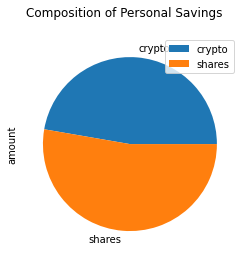

In [33]:
# Plot savings pie chart
df_savings.plot(kind='pie', title='Composition of Personal Savings', ylabel='amount', subplots=True)

In [35]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if total_savings == emergency_fund:
    print(f'Congratulations on reaching your financial goal!')
elif total_savings > emergency_fund:
    print(f'Congratulations! Your are prepared for an emergency')
else:
    print(f'You are ${print(emergency_fund - total_savings)} from reaching your financial goal!')

Congratulations! Your are prepared for an emergency


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [36]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [39]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data= api.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [40]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_60 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [41]:
# Printing the simulation input data
MC_40_60.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [42]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\tjfoo\Desktop\Fintech\Week5\05-APIs\Financial_Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0          1         2         3          4          5    \
0      1.000000   1.000000  1.000000  1.000000   1.000000   1.000000   
1      1.008236   0.997929  0.997051  1.000144   1.003656   0.993216   
2      1.016589   0.996115  0.993484  1.003207   0.991943   0.995929   
3      1.002447   0.997802  0.997086  1.012586   0.989445   0.991308   
4      1.009038   1.012392  1.005590  1.020412   0.993937   0.994192   
...         ...        ...       ...       ...        ...        ...   
7556  31.410722  28.756975  6.386321  8.309818  18.813208  17.311237   
7557  31.627985  28.679554  6.458389  8.328730  18.957156  17.333994   
7558  31.807168  28.648638  6.461841  8.242471  18.993681  17.688375   
7559  31.647448  28.748139  6.445796  8.235224  18.926435  17.773234   
7560  31.836654  28.343832  6.447395  8.222652  18.884198  17.893349   

           6          7          8          9    ...        490       491  \
0     1.000000   1.000000   1.000000   1.000000  ...   1.000000  1.000000   
1     1.001443   0.999127   1.005783   1.007470  ...   0.989076  1.006514   
2     1.003663   1.001267   1.009391   1.019435  ...   0.988960  1.000189   
3     0.996805   0.999408   1.009908   1.026800  ...   0.996851  0.995912   
4     1.021085   0.991407   1.005723   1.024829  ...   0.987101  1.000670   
...        ...        ...        ...        ...  ...        ...       ...   
7556  9.446090  13.276162  38.986169  28.791082  ...  13.914971  5.629673   
7557  9.478022  13.100718  39.156616  28.854046  ...  13.896488  5.684454   
7558  9.506250  12.983711  39.193489  28.581413  ...  13.800397  5.682004   
7559  9.495898  13.022390  39.192766  28.736169  ...  13.755227  5.697426   
7560  9.493817  13.155055  38.891272  28.921436  ...  13.804964  5.710399   

            492        493        494        495        496        497  \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      0.996648   0.991585   0.991846   0.986759   0.999902   0.998931   
2      0.995529   1.005658   0.987770   1.001042   1.011585   0.998947   
3      0.999136   1.014926   0.998878   0.992639   1.013402   1.004150   
4      1.006182   1.012954   0.998290   0.997186   1.019565   1.009495   
...         ...        ...        ...        ...        ...        ...   
7556  10.262159  31.755940  12.469367  11.120577  25.454460  21.873552   
7557  10.214409  31.834119  12.461674  11.179328  25.706043  21.899701   
7558  10.224934  31.675398  12.508386  11.089308  25.708822  22.023269   
7559  10.280057  31.710518  12.552507  11.051606  25.673246  21.904289   
7560  10.205710  32.002728  12.607198  11.138917  25.643286  21.941891   

            498       499  
0      1.000000  1.000000  
1      0.993844  1.006112  
2      0.993741  1.005233  
3      0.995990  1.002483  
4      0.995374  0.985235  
...         ...       ...  
7556  64.858940  7.315451  
7557  65.669838  7.337004  
7558  65.389477  7.288830  
7559  65.550548  7.297607  
7560  65.300410  7.224697  

[7561 rows x 500 columns]

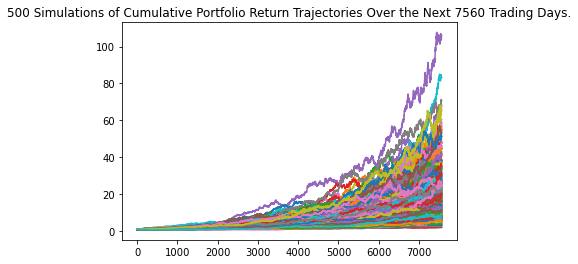

In [43]:
# Plot simulation outcomes
line_plot = MC_40_60.plot_simulation()

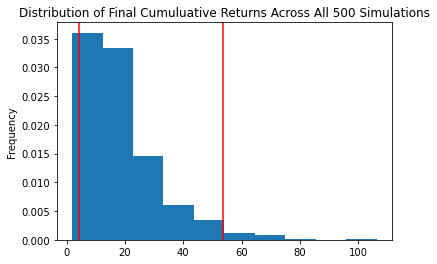

In [44]:
# Plot probability distribution and confidence intervals
dist_plot = MC_40_60.plot_distribution()

### Retirement Analysis

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary_stats = MC_40_60.summarize_cumulative_return()

# Print summary statistics
print(MC_summary_stats)

count           500.000000
mean             18.914867
std              13.181601
min               1.905595
25%               9.598447
50%              15.575804
75%              23.698541
max             106.208420
95% CI Lower      4.102722
95% CI Upper     53.699277
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [46]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_summary_stats[8]*initial_investment,2)
ci_upper = round(MC_summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $82054.45 and $1073985.54


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [47]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_summary_stats[8]*initial_investment,2)
ci_upper = round(MC_summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $123081.67 and $1610978.31


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [56]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_60_40 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [57]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_60_40.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\tjfoo\Desktop\Fintech\Week5\05-APIs\Financial_Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.008931  1.008830  0.997169  1.005621  1.001783  1.002955  1.002261   
2     1.008567  1.015091  1.002571  1.006829  0.995670  1.007789  1.003471   
3     1.007312  1.021588  1.002257  1.012929  0.996752  1.012656  1.002216   
4     1.006825  1.031760  0.997870  1.002364  0.994888  1.009907  1.002337   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.729356  1.363557  1.053545  1.390066  0.984092  1.444176  1.656405   
1257  1.730871  1.378978  1.052907  1.393247  0.991286  1.451153  1.656209   
1258  1.716342  1.375080  1.053419  1.398149  0.987321  1.448395  1.665667   
1259  1.715389  1.371897  1.047711  1.399884  0.978667  1.451113  1.667020   
1260  1.712649  1.368329  1.044863  1.398027  0.976649  1.456278  1.670591   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.003519  0.987498  1.002393  ...  1.003313  1.001260  1.009506   
2     1.009983  0.984594  1.000840  ...  1.003381  1.003249  1.011212   
3     1.011853  0.981851  1.004003  ...  1.010933  0.999763  1.005466   
4     1.008480  0.973556  0.998652  ...  1.017206  1.000812  0.999228   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.457927  1.253519  1.249608  ...  1.243367  1.165892  1.072202   
1257  1.465616  1.254919  1.241368  ...  1.248285  1.167025  1.069183   
1258  1.462625  1.258404  1.240110  ...  1.241250  1.168853  1.068613   
1259  1.463081  1.261062  1.241877  ...  1.237901  1.170080  1.066062   
1260  1.448581  1.272182  1.240161  ...  1.231503  1.177722  1.068841   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.000604  1.012969  0.999410  0.999579  1.004234  1.007213  1.006607  
2     0.996610  1.010143  1.003063  0.997299  1.010330  1.003245  1.014793  
3     0.986468  1.014690  1.001200  0.992468  1.006005  1.003724  1.011765  
4     0.986971  1.013026  0.998564  0.988940  1.005919  1.005432  1.006736  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.131864  1.819657  1.680397  1.283559  1.566045  1.373821  1.633585  
1257  1.132044  1.819393  1.681703  1.282153  1.570748  1.373714  1.628283  
1258  1.131841  1.826086  1.669134  1.292138  1.552026  1.377247  1.632029  
1259  1.134676  1.838827  1.674559  1.271556  1.552992  1.374176  1.636583  
1260  1.131192  1.862138  1.672329  1.266102  1.547938  1.371316  1.648856  

[1261 rows x 500 columns]

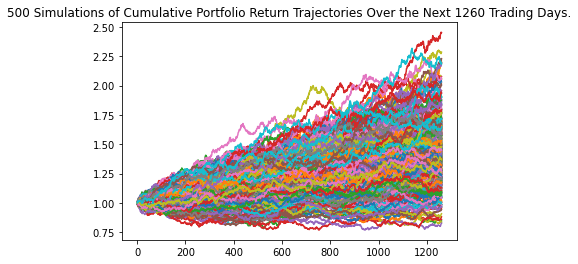

In [58]:
# Plot simulation outcomes
line_plot_60_40 = MC_60_40.plot_simulation()

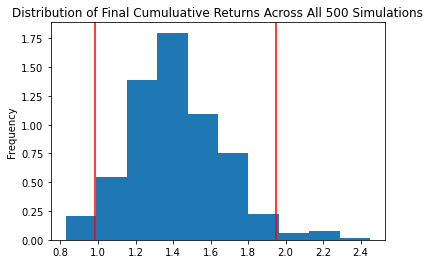

In [59]:
# Plot probability distribution and confidence intervals
dist_plot_60_40 = MC_60_40.plot_distribution()

In [60]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary_stats_60_40 = MC_60_40.summarize_cumulative_return()

# Print summary statistics
print(MC_summary_stats_60_40)

count           500.000000
mean              1.417631
std               0.247969
min               0.828293
25%               1.246943
50%               1.401958
75%               1.573860
max               2.450997
95% CI Lower      0.982269
95% CI Upper      1.947490
Name: 1260, dtype: float64


In [61]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_summary_stats_60_40[8]*initial_investment,2)
ci_upper_five = round(MC_summary_stats_60_40[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58936.12 and $116849.43


### Ten Years Retirement Option

In [62]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_60_40 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [63]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_60_40.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\tjfoo\Desktop\Fintech\Week5\05-APIs\Financial_Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.998657  1.000480  1.008160  0.989656  1.011233  1.009381  0.994886   
2     1.004280  1.009200  1.021551  0.985296  1.004174  1.014863  1.003415   
3     1.002212  1.018497  1.022655  0.995932  1.008752  1.016549  1.004743   
4     1.005794  1.014574  1.020940  1.000996  1.009624  1.017966  1.006578   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.222896  1.141572  1.486469  1.507855  1.802489  1.760404  2.727764   
2517  2.233666  1.135334  1.489772  1.496144  1.801301  1.771729  2.728374   
2518  2.235163  1.143395  1.490065  1.495605  1.814360  1.766697  2.732988   
2519  2.231744  1.140485  1.491444  1.490022  1.811152  1.757288  2.725864   
2520  2.231476  1.138669  1.506580  1.472380  1.826424  1.745450  2.704775   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.993126  0.999357  0.998212  ...  1.004154  0.989734  0.997714   
2     0.997319  1.000037  1.002381  ...  1.000010  0.991890  0.997018   
3     0.996081  1.014356  1.007753  ...  1.002902  0.989278  0.987974   
4     1.001734  1.011086  1.016375  ...  1.003666  0.990057  0.983135   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.352183  1.770509  1.841699  ...  1.762615  1.004966  1.482295   
2517  1.355504  1.779058  1.845885  ...  1.754389  1.005382  1.475369   
2518  1.357261  1.768386  1.859791  ...  1.750917  1.007884  1.473476   
2519  1.353077  1.769074  1.858433  ...  1.760526  1.014071  1.468729   
2520  1.354189  1.780551  1.862168  ...  1.760148  1.015494  1.476816   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.003909  0.995171  0.997294  0.995457  0.999357  0.994613  0.997399  
2     0.998793  0.992379  0.987607  0.994054  0.997033  0.995667  0.988610  
3     1.005203  0.994936  0.988456  0.995425  0.986863  0.995816  0.984673  
4     1.004263  0.995566  0.992523  0.995359  0.992380  0.994813  0.976947  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.830965  2.420607  2.886492  2.038171  1.954872  2.253333  2.050821  
2517  1.841257  2.421199  2.914750  2.041994  1.951743  2.248153  2.061775  
2518  1.831085  2.408588  2.909628  2.035759  1.960387  2.242267  2.071826  
2519  1.817335  2.412373  2.924012  2.027364  1.967490  2.218175  2.051498  
2520  1.818080  2.432329  2.930833  2.026757  1.969185  2.212336  2.043919  

[2521 rows x 500 columns]

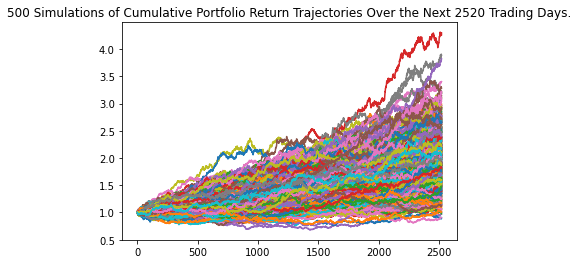

In [64]:
# Plot simulation outcomes
line_plot_60_40 = MC_60_40.plot_simulation()

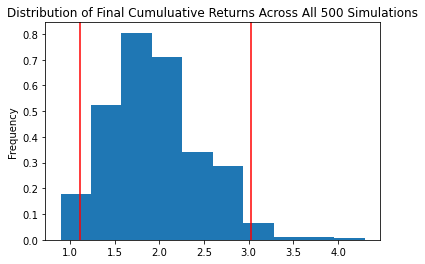

In [65]:
# Plot probability distribution and confidence intervals
dist_plot_60_40 = MC_60_40.plot_distribution()

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary_stats_60_40 = MC_60_40.summarize_cumulative_return()

# Print summary statistics
print(MC_summary_stats_60_40)

count           500.000000
mean              1.969620
std               0.514127
min               0.895188
25%               1.597277
50%               1.902925
75%               2.248232
max               4.298535
95% CI Lower      1.118106
95% CI Upper      3.020814
Name: 2520, dtype: float64


In [67]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_summary_stats_60_40[8]*initial_investment,2)
ci_upper_ten = round(MC_summary_stats_60_40[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $67086.39 and $181248.84
